# Preprocessing data

Tahap pertama penyetinggan API, Libraries, Dataset

In [ ]:
# Block 1: Install Kaggle API dan Download Dataset

# Install Kaggle API
!pip install -q kaggle

# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from google.colab import files

# Unggah file kaggle.json dari komputer Anda
files.upload()

# Pindahkan file kaggle.json ke direktori yang benar
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verifikasi Kaggle API
!kaggle datasets list

# Download dataset dengan nama yang benar
!kaggle datasets download -d allandclive/chicken-disease-1 --force

# Unzip dataset ke dalam folder /content/dataset
!unzip -o chicken-disease-1.zip -d /content/dataset

# List file di dalam folder /content/dataset
!ls /content/dataset

# Opsional: Simpan dataset ke Google Drive untuk penggunaan di sesi berikutnya
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Salin dataset ke Google Drive untuk backup
!cp -r /content/dataset /content/drive/MyDrive/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Train/healthy.1869.jpg  
  inflating: /content/dataset/Train/healthy.187.jpg  
  inflating: /content/dataset/Train/healthy.1870.jpg  
  inflating: /content/dataset/Train/healthy.1871.jpg  
  inflating: /content/dataset/Train/healthy.1872.jpg  
  inflating: /content/dataset/Train/healthy.1873.jpg  
  inflating: /content/dataset/Train/healthy.1874.jpg  
  inflating: /content/dataset/Train/healthy.1875.jpg  
  inflating: /content/dataset/Train/healthy.1876.jpg  
  inflating: /content/dataset/Train/healthy.1877.jpg  
  inflating: /content/dataset/Train/healthy.1878.jpg  
  inflating: /content/dataset/Train/healthy.1879.jpg  
  inflating: /content/dataset/Train/healthy.188.jpg  
  inflating: /content/dataset/Train/healthy.1880.jpg  
  inflating: /content/dataset/Train/healthy.1881.jpg  
  inflating: /content/dataset/Train/healthy.1882.jpg  
  inflating: /content/dataset/Train/healthy.1883.jpg  
  inflating: /co

melihat isi folder

In [ ]:
!ls /content/dataset/Train/


cocci.0.jpg	cocci.560.jpg	  healthy.2012.jpg  pcrcocci.3.jpg	salmo.159.jpg
cocci.1000.jpg	cocci.561.jpg	  healthy.2013.jpg  pcrcocci.40.jpg	salmo.15.jpg
cocci.1001.jpg	cocci.562.jpg	  healthy.2014.jpg  pcrcocci.41.jpg	salmo.1600.jpg
cocci.1002.jpg	cocci.563.jpg	  healthy.2015.jpg  pcrcocci.42.jpg	salmo.1601.jpg
cocci.1003.jpg	cocci.564.jpg	  healthy.2016.jpg  pcrcocci.43.jpg	salmo.1602.jpg
cocci.1004.jpg	cocci.565.jpg	  healthy.2017.jpg  pcrcocci.44.jpg	salmo.1603.jpg
cocci.1005.jpg	cocci.566.jpg	  healthy.2018.jpg  pcrcocci.45.jpg	salmo.1604.jpg
cocci.1006.jpg	cocci.567.jpg	  healthy.2019.jpg  pcrcocci.46.jpg	salmo.1605.jpg
cocci.1007.jpg	cocci.568.jpg	  healthy.201.jpg   pcrcocci.47.jpg	salmo.1606.jpg
cocci.1008.jpg	cocci.569.jpg	  healthy.2020.jpg  pcrcocci.48.jpg	salmo.1607.jpg
cocci.1009.jpg	cocci.56.jpg	  healthy.2021.jpg  pcrcocci.49.jpg	salmo.1608.jpg
cocci.100.jpg	cocci.570.jpg	  healthy.2022.jpg  pcrcocci.4.jpg	salmo.1609.jpg
cocci.1010.jpg	cocci.571.jpg	  healthy.2023.jpg  p

install TensorFlow

In [ ]:
!pip uninstall tensorflow -y
!pip uninstall keras -y

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0


In [ ]:
!pip install tensorflow==2.9.1 keras==2.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 28.7 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tens

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.9.1


In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


Pembagian data untuk train, validation dan test

In [ ]:
# Import library yang diperlukan
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Fungsi untuk membagi data menjadi train, valid, dan test
def split_data(data_dir, csv_dir):
    # Membaca file CSV ke dalam dataframe pandas
    df = pd.read_csv(csv_dir)

    # Mengubah nama kolom agar konsisten
    df.columns = ['images', 'label']

    # Menggabungkan file path gambar dengan direktori data
    df['images'] = df['images'].apply(lambda x: os.path.join(data_dir, x))

    # Membagi data menjadi dataset pelatihan (80%)
    strat = df['label']
    train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=123, stratify=strat)

    # Membagi sisa data menjadi dataset validasi dan uji (masing-masing 50%)
    strat = dummy_df['label']
    valid_df, test_df = train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=123, stratify=strat)

    return train_df, valid_df, test_df

# Contoh penggunaan fungsi split_data
data_dir = '/content/dataset/Train'  # Ganti dengan direktori data gambar Anda
csv_dir = '/content/dataset/train_data.csv'  # Ganti dengan path file CSV Anda

# Memanggil fungsi untuk membagi data
train_df, valid_df, test_df = split_data(data_dir, csv_dir)

# Menampilkan beberapa baris pertama dari masing-masing dataset
print("Data Pelatihan (Train):")
print(train_df.head())

print("\nData Validasi (Valid):")
print(valid_df.head())

print("\nData Uji (Test):")
print(test_df.head())


Data Pelatihan (Train):
                                       images               label
4679     /content/dataset/Train/salmo.346.jpg          Salmonella
5947  /content/dataset/Train/pcrsalmo.188.jpg          Salmonella
1821   /content/dataset/Train/healthy.352.jpg             Healthy
1538   /content/dataset/Train/healthy.293.jpg             Healthy
3631    /content/dataset/Train/pcrncd.146.jpg  New Castle Disease

Data Validasi (Valid):
                                      images               label
5725  /content/dataset/Train/healthy.978.jpg             Healthy
4724    /content/dataset/Train/salmo.294.jpg          Salmonella
4211   /content/dataset/Train/salmo.1512.jpg          Salmonella
462       /content/dataset/Train/ncd.192.jpg  New Castle Disease
266     /content/dataset/Train/cocci.836.jpg         Coccidiosis

Data Uji (Test):
                                       images        label
1009  /content/dataset/Train/healthy.1663.jpg      Healthy
6511   /content/dataset/Train/

In [ ]:
# Menampilkan beberapa gambar dan label dari train_df berdasarkan indeks kelas 0, 1, 2, dan 3
class_labels = {0: 'Salmonella', 1: 'Healthy', 2: 'New Castle Disease', 3: 'Coccidiosis'}

# Melihat contoh data untuk masing-masing kelas
for class_index in range(4):  # Menggunakan range untuk 0 sampai 3
    class_data = train_df[train_df['label'] == class_labels.get(class_index)]

    print(f"\nContoh data untuk kelas {class_index} ({class_labels.get(class_index)}):")
    print(class_data.head())  # Menampilkan beberapa baris pertama dari kelas tersebut



Contoh data untuk kelas 0 (Salmonella):
                                       images       label
4679     /content/dataset/Train/salmo.346.jpg  Salmonella
5947  /content/dataset/Train/pcrsalmo.188.jpg  Salmonella
228     /content/dataset/Train/salmo.2187.jpg  Salmonella
3093    /content/dataset/Train/salmo.1720.jpg  Salmonella
3641    /content/dataset/Train/salmo.1113.jpg  Salmonella

Contoh data untuk kelas 1 (Healthy):
                                         images    label
1821     /content/dataset/Train/healthy.352.jpg  Healthy
1538     /content/dataset/Train/healthy.293.jpg  Healthy
7691  /content/dataset/Train/pcrhealthy.186.jpg  Healthy
597      /content/dataset/Train/healthy.285.jpg  Healthy
3401    /content/dataset/Train/healthy.1110.jpg  Healthy

Contoh data untuk kelas 2 (New Castle Disease):
                                     images               label
3631  /content/dataset/Train/pcrncd.146.jpg  New Castle Disease
4635     /content/dataset/Train/ncd.308.jpg  New Castl

Menghasilkan gambar dari kerangka data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_gens(train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''

    # Define model parameters
    img_size = (224, 224)  # Size of the images (height, width)
    channels = 3  # For RGB images
    color = 'rgb'  # Color mode (RGB)
    img_shape = (img_size[0], img_size[1], channels)

    # Determine the batch size for test data to ensure no overloading
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length // n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function is used in image data generator for data augmentation. In this case, no augmentation, just scaling.
    def scalar(img):
        return img

    # Creating ImageDataGenerator for training and testing with data augmentation
    tr_gen = ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
    ts_gen = ImageDataGenerator(preprocessing_function=scalar)

    # Creating data generators for training, validation, and test datasets
    train_gen = tr_gen.flow_from_dataframe(
        dataframe=train_df,  # Dataframe for training
        x_col='images',  # Column with image file paths
        y_col='label',  # Column with the labels
        target_size=img_size,  # Resize images to match the model input size
        class_mode='categorical',  # One-hot encode labels for multi-class classification
        color_mode=color,  # Use RGB images
        shuffle=True,  # Shuffle the dataset for training
        batch_size=batch_size  # Set the batch size
    )

    valid_gen = ts_gen.flow_from_dataframe(
        dataframe=valid_df,  # Dataframe for validation
        x_col='images',  # Column with image file paths
        y_col='label',  # Column with the labels
        target_size=img_size,  # Resize images to match the model input size
        class_mode='categorical',  # One-hot encode labels for multi-class classification
        color_mode=color,  # Use RGB images
        shuffle=True,  # Shuffle the dataset for validation
        batch_size=batch_size  # Set the batch size
    )

    # Note: for test, shuffle=False, and use custom test_batch_size
    test_gen = ts_gen.flow_from_dataframe(
        dataframe=test_df,  # Dataframe for testing
        x_col='images',  # Column with image file paths
        y_col='label',  # Column with the labels
        target_size=img_size,  # Resize images to match the model input size
        class_mode='categorical',  # One-hot encode labels for multi-class classification
        color_mode=color,  # Use RGB images
        shuffle=False,  # Do not shuffle the dataset for testing
        batch_size=test_batch_size  # Use the custom test batch size
    )

    return train_gen, valid_gen, test_gen


Menampilkan sampel data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(gen):
    '''
    This function takes the data generator and shows a sample of the images.
    It will display the images in a 5x5 grid.
    '''

    # Retrieve the class dictionary from the generator
    g_dict = gen.class_indices        # Defines dictionary {'class': index}
    classes = list(g_dict.keys())     # Defines list of dictionary's keys (class names as strings)

    # Get a batch of images and their labels from the generator
    images, label = next(gen)

    # Calculate number of images to display (minimum of batch size or 25)
    length = len(label)        # Length of the batch (number of images)
    sample = min(length, 25)    # Check if sample size is less than 25

    # Create a large figure for displaying the images
    plt.figure(figsize=(20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)  # Create a 5x5 grid for displaying images

        # Scale the image data to [0, 1] if needed
        images = images[i] / 255.0  # Ensure the pixel values are scaled to [0, 1]

        # Display the image
        plt.imshow(images)

        # Get the class index and class name from the labels
        index = np.argmax(label[i])  # Get the index of the class with the highest probability
        class_name = classes[index]   # Get the class name using the index

        # Set the title of the image (class name)
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')  # Hide axis labels

    # Show the images
    plt.show()


Callbacks

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow import keras

class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience  # Specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience  # Specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold  # Specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor  # Factor by which to reduce the learning rate
        self.batches = batches  # Number of training batches per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch  # Save this value to restore if restarting training

        # Callback variables
        self.count = 0  # How many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1  # Epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr))  # Initial learning rate
        self.highest_tracc = 0.0  # Highest training accuracy initially set to 0
        self.lowest_vloss = np.inf  # Lowest validation loss initially set to infinity
        self.best_weights = self.model.get_weights()  # Best weights initially set to model's initial weights
        self.initial_weights = self.model.get_weights()  # Save initial weights if they need to be restored

    # Define function that runs when training begins
    def on_train_begin(self, logs=None):
        msg = 'Do you want the model to ask you to halt the training [y/n]?'
        print(msg)
        ans = input('')
        if ans.lower() == 'y':
            self.ask_permission = 1
        else:
            self.ask_permission = 0

        header = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
        print(header)
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'Training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds'
        print(msg)

        # Set the model weights to the best weights found during training
        self.model.set_weights(self.best_weights)

    def on_train_batch_end(self, batch, logs=None):
        # Get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # Print progress over the same line to show running batch count
        msg = '{0:20s}Processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='')

    def on_epoch_begin(self, epoch, logs=None):
        self.ep_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))  # Get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # Get training accuracy
        v_acc = logs.get('val_accuracy')  # Get validation accuracy
        loss = logs.get('loss')  # Get training loss for this epoch
        v_loss = logs.get('val_loss')  # Get validation loss for this epoch

        if acc < self.threshold:  # If training accuracy is below threshold, adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc) * 100 / self.highest_tracc  # Improvement in accuracy

            if acc > self.highest_tracc:  # Training accuracy improved in this epoch
                self.highest_tracc = acc  # Update highest training accuracy
                self.best_weights = self.model.get_weights()  # Save weights
                self.count = 0  # Reset count
                self.stop_count = 0  # Reset stop counter
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # Set the best epoch

            else:
                if self.count >= self.patience - 1:  # Adjust lr if no improvement
                    lr = lr * self.factor  # Adjust the learning rate by a factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr)  # Set the learning rate in the optimizer
                    self.count = 0  # Reset the count
                    self.stop_count += 1  # Increment stop count
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count += 1  # Increment patience counter

        else:  # If training accuracy is above threshold, adjust lr based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (self.lowest_vloss - v_loss) * 100 / self.lowest_vloss  # Improvement in validation loss

            if v_loss < self.lowest_vloss:  # If validation loss improved
                self.lowest_vloss = v_loss  # Update lowest validation loss
                self.best_weights = self.model.get_weights()  # Save weights
                self.count = 0  # Reset count
                self.stop_count = 0
                self.best_epoch = epoch + 1  # Update best epoch

            else:
                if self.count >= self.patience - 1:  # Adjust learning rate
                    lr = lr * self.factor  # Reduce learning rate
                    self.stop_count += 1  # Increment stop count
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr)  # Update the learning rate
                else:
                    self.count += 1  # Increment count

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        # Print the training stats
        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        # Stop training if no improvement after certain adjustments
        if self.stop_count > self.stop_patience - 1:
            msg = f'Training halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True  # Stop training

        else:
            if self.ask_epoch is not None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'Enter H to halt training or an integer for the number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans.lower() == 'h':
                        msg = f'Training halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True  # Stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f'Training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            header = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(header)

                        except ValueError:
                            print(f'Invalid input. Please enter either an integer or "h"')



Memetakan history pelatihan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training(hist):
    '''
    This function takes the training history and plots the history of accuracy and losses with the best epoch in both of them.
    '''

    # Extract history data
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    # Find the best epoch based on the lowest validation loss and highest validation accuracy
    index_loss = np.argmin(val_loss)  # Index of the best validation loss
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)  # Index of the best validation accuracy
    acc_highest = val_acc[index_acc]

    # Prepare epoch range
    Epochs = [i+1 for i in range(len(tr_acc))]

    # Labels for best epoch markers
    loss_label = f'Best epoch = {str(index_loss + 1)}'
    acc_label = f'Best epoch = {str(index_acc + 1)}'

    # Plotting
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')

    # Training and validation loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training Loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Training and validation accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


Membuat Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''
    This function plots the confusion matrix.
    y_true: True label
    y_pred: Predicted label
    classes: List of class label
    normalize: Whether to normalize the confusion matrix or not
    title: Title of the plot
    cmap: Colormap for the plot
    '''

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix if needed
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')

    print(cm)

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Add labels for x and y axes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Annotate each cell with the numeric value
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    # Layout adjustments
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Show the plot
    plt.show()


Lihat dataset

In [ ]:
data_dir = '/content/dataset/Train'
csv_dir = '/content/dataset/train_data.csv'

# try:
    # Get splitted data
train_df, valid_df, test_df = split_data(data_dir, csv_dir)

# Get Generators
batch_size = 40
train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

# except:
#     print('Invalid Input')

Found 6453 validated image filenames belonging to 4 classes.
Found 807 validated image filenames belonging to 4 classes.
Found 807 validated image filenames belonging to 4 classes.


Cek Image Sample

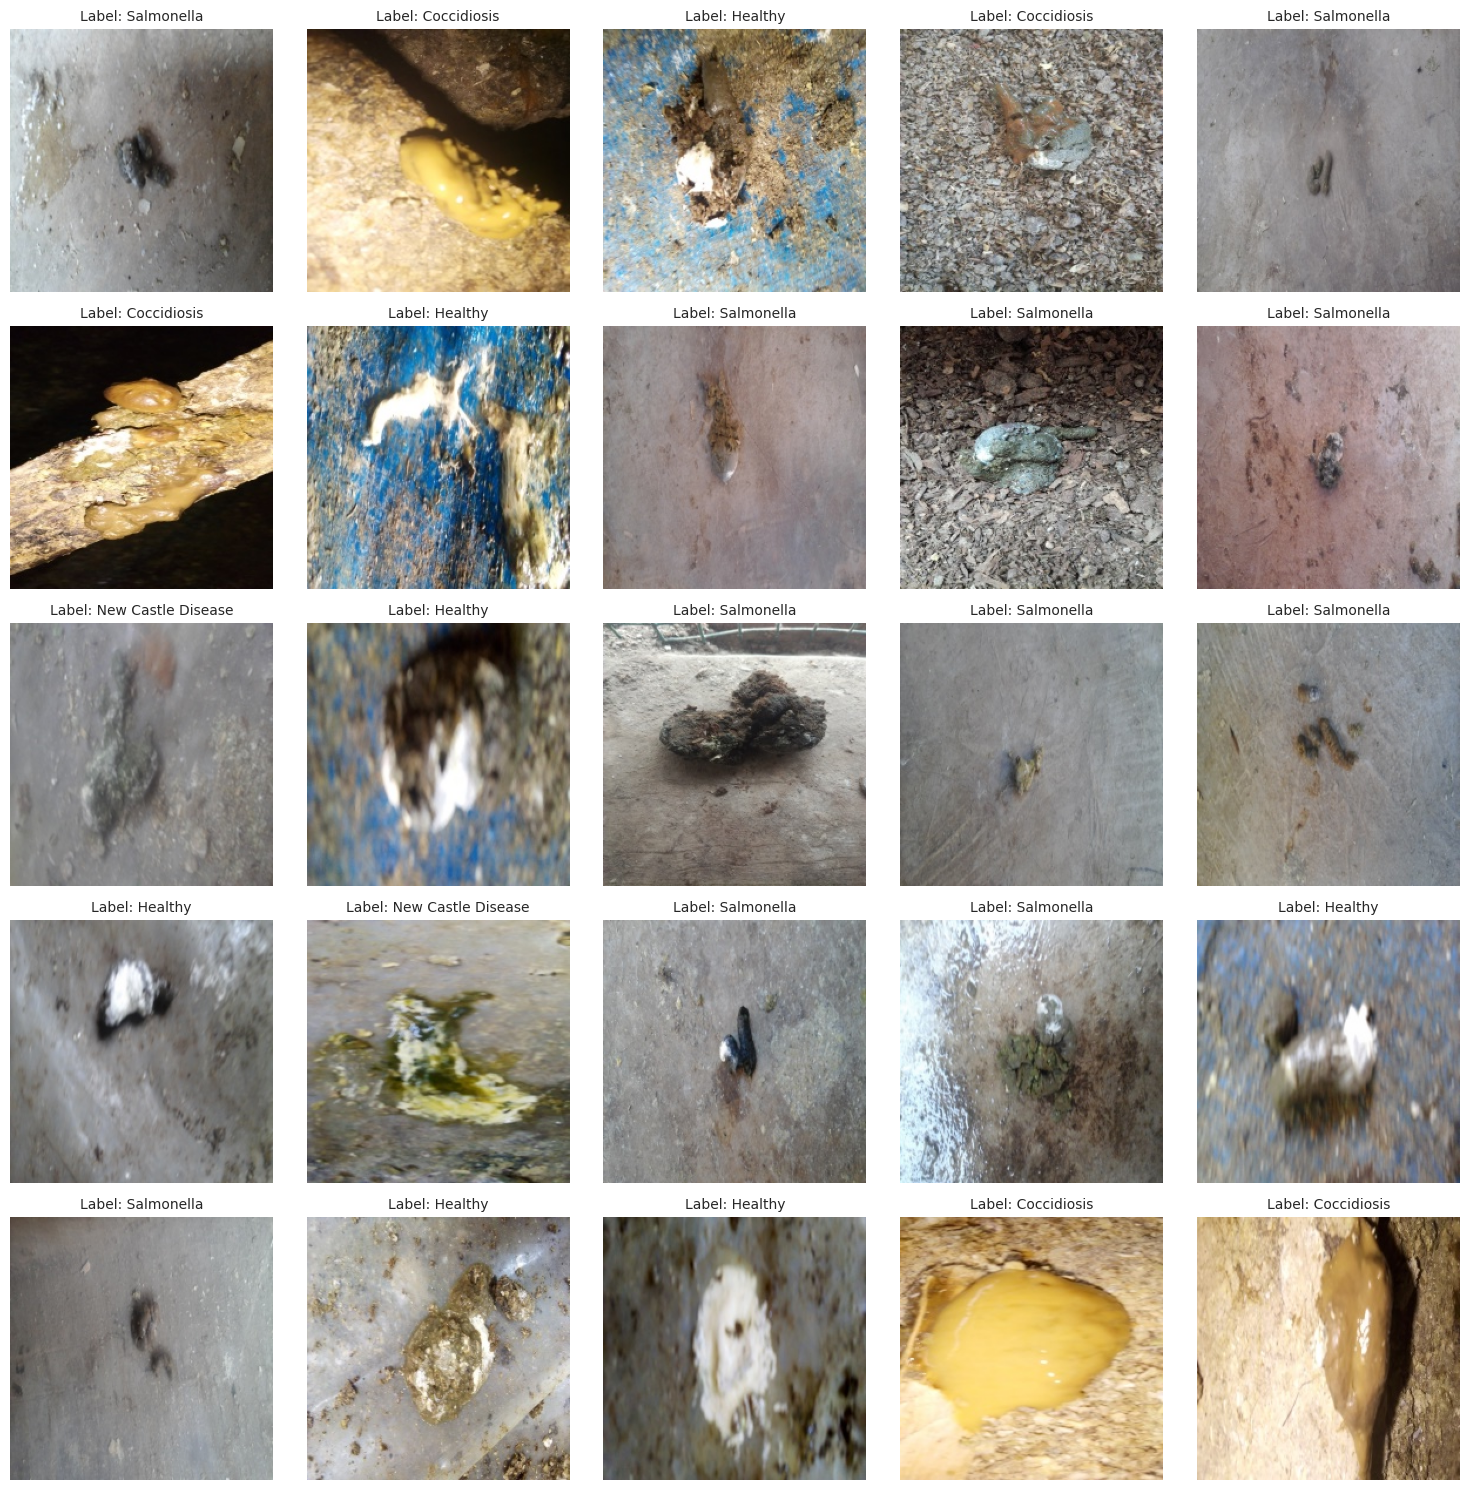

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names corresponding to the labels
class_names = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']

def show_images(generator, num_images=25):
    '''
    This function fetches a batch of images from the generator and displays them in a 5x5 grid.
    It will show the first `num_images` images from a single batch.
    '''
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Normalize images if necessary (if they are floats and out of range)
    if images.dtype == np.float32 and images.max() > 1.0:
        images = images / 255.0  # Normalize to [0, 1] if needed

    # Set the number of images to display
    num_images = min(num_images, images.shape[0])

    # Set up the plot for displaying images (5x5 grid)
    plt.figure(figsize=(15, 15))

    # Loop through and plot each image
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)  # 5 rows, 5 columns
        plt.imshow(images[i])
        plt.axis('off')

        # Get the label for the image (index of the highest value in one-hot encoding)
        label_index = np.argmax(labels[i])  # Get the index of the class
        label_name = class_names[label_index]  # Map to the class name
        plt.title(f"Label: {label_name}", fontsize=10)

    plt.tight_layout()  # Ensure there's no overlap
    plt.show()

# Call the function to display images from the train_gen
show_images(train_gen)


Membuat model

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))  # to define number of classes in dense layer

# Create pre-trained model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Build the model
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile the model
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                           

Set Callback Parameters

In [ ]:
import numpy as np
from tensorflow.keras.callbacks import Callback

# Define custom callback for learning rate adjustments, early stopping, etc.
class MyCallback(Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience
        self.stop_patience = stop_patience
        self.threshold = threshold
        self.factor = factor
        self.batches = batches
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.best_accuracy = 0
        self.wait = 0
        self.stop_wait = 0

    def on_epoch_end(self, epoch, logs=None):
        # Adjust learning rate if accuracy does not improve
        current_accuracy = logs.get('accuracy')  # You can also monitor validation accuracy or loss

        if current_accuracy is not None:
            if current_accuracy > self.best_accuracy:
                self.best_accuracy = current_accuracy
                self.wait = 0  # Reset the wait counter
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    old_lr = float(self.model.optimizer.lr)
                    new_lr = old_lr * self.factor
                    self.model.optimizer.lr = new_lr
                    print(f"Reducing learning rate to {new_lr} due to no improvement in accuracy.")
                    self.wait = 0  # Reset wait after reducing learning rate

        # Stop training early if no improvement after 'stop_patience' epochs
        if self.stop_wait >= self.stop_patience:
            print(f"Stopping training early due to no improvement for {self.stop_patience} epochs.")
            self.model.stop_training = True
        else:
            if current_accuracy < self.threshold:
                self.stop_wait += 1
            else:
                self.stop_wait = 0

        # Ask whether to stop training after 'ask_epoch' epochs
        if (epoch + 1) % self.ask_epoch == 0:
            user_input = input(f"Epoch {epoch+1}/{self.epochs}: Do you want to stop training? (yes/no): ")
            if user_input.lower() == 'yes':
                self.model.stop_training = True

# Set Callback Parameters
batch_size = 10   # Set batch size for training
epochs = 10       # Number of all epochs in training
patience = 1      # Number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3 # Number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # If train accuracy is < threshold, adjust monitor accuracy; else monitor validation loss
factor = 0.5      # Factor to reduce lr by
ask_epoch = 5     # Number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size)) # Number of training batches to run per epoch

# Define the callbacks
callbacks = [MyCallback(
    model=model, patience=patience, stop_patience=stop_patience, threshold=threshold,
    factor=factor, batches=batches, epochs=epochs, ask_epoch=ask_epoch
)]


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tambahkan checkpoint callback
checkpoint = ModelCheckpoint(
    filepath='model_checkpoint.h5',  # Nama file untuk menyimpan model
    save_best_only=False,  # Set False untuk menyimpan di setiap epoch, bukan hanya model terbaik
    save_weights_only=False,  # Set False untuk menyimpan seluruh model (arsitektur dan bobot)
    verbose=1
)

# Tambahkan ke dalam daftar callbacks
callbacks.append(checkpoint)


Train model

In [ ]:
# Train the model
history = model.fit(
    x=train_gen,  # Training data generator
    epochs=epochs,  # Number of epochs
    verbose=1,  # Set verbose to 1 to show training progress
    callbacks=callbacks,  # List of callbacks (e.g., MyCallback for learning rate adjustment and early stopping)
    validation_data=valid_gen,  # Validation data generator
    validation_steps=None,  # You can set validation_steps if needed, or leave it as None
    shuffle=False  # Whether to shuffle the training data or not (set to False for sequential data)
)


Epoch 1/10
162/162 [==============================] - ETA: 0s - loss: 6.0991 - accuracy: 0.8577 
Epoch 1: saving model to model_checkpoint.h5

Epoch 1: saving model to model_checkpoint.h5
162/162 [==============================] - 1714s 11s/step - loss: 6.0991 - accuracy: 0.8577 - val_loss: 5.9761 - val_accuracy: 0.4164
Epoch 2/10
162/162 [==============================] - ETA: 0s - loss: 3.3146 - accuracy: 0.9501
Epoch 2: saving model to model_checkpoint.h5

Epoch 2: saving model to model_checkpoint.h5
162/162 [==============================] - 1642s 10s/step - loss: 3.3146 - accuracy: 0.9501 - val_loss: 4.5337 - val_accuracy: 0.4263
Epoch 3/10
162/162 [==============================] - ETA: 0s - loss: 1.9260 - accuracy: 0.9651
Epoch 3: saving model to model_checkpoint.h5

Epoch 3: saving model to model_checkpoint.h5
162/162 [==============================] - 1607s 10s/step - loss: 1.9260 - accuracy: 0.9651 - val_loss: 2.5218 - val_accuracy: 0.5824
Epoch 4/10
162/162 [================

In [ ]:
from tensorflow.keras.models import load_model

# Load model dari checkpoint
model = load_model('model_checkpoint.h5')

# Lanjutkan pelatihan
history = model.fit(
    x=train_gen,
    epochs=10,  # Total epoch, dari 1 hingga 10
    initial_epoch=5,  # Mulai dari epoch ke-6 (karena sudah sampai epoch 5)
    verbose=1,
    callbacks=callbacks,
    validation_data=valid_gen,
    shuffle=False
)


Epoch 6/10
162/162 [==============================] - ETA: 0s - loss: 0.4917 - accuracy: 0.9859 
Epoch 6: saving model to model_checkpoint.h5

Epoch 6: saving model to model_checkpoint.h5
162/162 [==============================] - 1658s 10s/step - loss: 0.4917 - accuracy: 0.9859 - val_loss: 0.6939 - val_accuracy: 0.8686
Epoch 7/10
162/162 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.9845Reducing learning rate to 0.0005000000237487257 due to no improvement in accuracy.

Epoch 7: saving model to model_checkpoint.h5

Epoch 7: saving model to model_checkpoint.h5
162/162 [==============================] - 1630s 10s/step - loss: 0.3717 - accuracy: 0.9845 - val_loss: 0.5669 - val_accuracy: 0.9021
Epoch 8/10
162/162 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.9882
Epoch 8: saving model to model_checkpoint.h5

Epoch 8: saving model to model_checkpoint.h5
162/162 [==============================] - 1621s 10s/step - loss: 0.2949 - accuracy: 0.

Display model performance

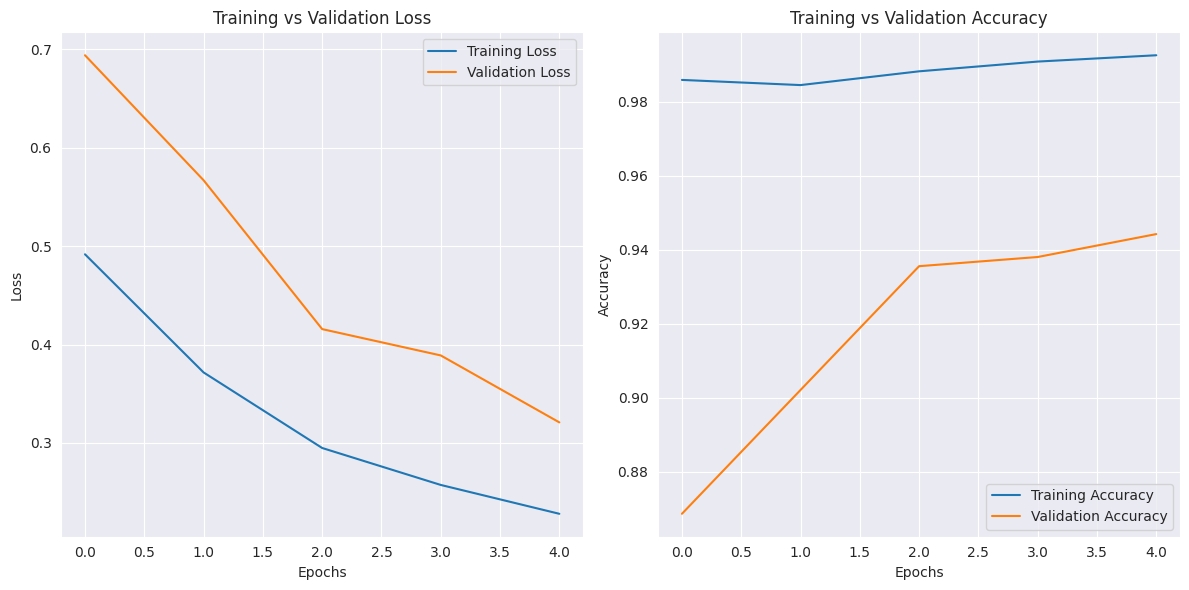

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call plot_training function with your history
plot_training(history)


In [ ]:
# Evaluate model performance on validation data
val_loss, val_accuracy = model.evaluate(valid_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


21/21 [==============================] - 32s 1s/step - loss: 0.3209 - accuracy: 0.9442
Validation Loss: 0.3209264874458313
Validation Accuracy: 0.9442379474639893


Evaluate model

In [ ]:
# Menentukan ukuran batch untuk pengujian
ts_length = len(test_gen.filenames)  # Ukuran data untuk pengujian (berdasarkan generator test)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))  # Batch size optimal
test_steps = ts_length // test_batch_size  # Total langkah untuk evaluasi

# Evaluasi model pada data training, validasi, dan pengujian
train_score = model.evaluate(train_gen, steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Menampilkan hasil evaluasi
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


162/269 [=================>............] - ETA: 3:12 - loss: 0.2015 - accuracy: 0.9915

 21/269 [=>............................] - ETA: 6:11 - loss: 0.3209 - accuracy: 0.9442

269/269 [==============================] - 34s 126ms/step - loss: 0.2845 - accuracy: 0.9579
Train Loss:  0.2015274316072464
Train Accuracy:  0.991476833820343
--------------------
Validation Loss:  0.3209265172481537
Validation Accuracy:  0.9442379474639893
--------------------
Test Loss:  0.2844816744327545
Test Accuracy:  0.9578686356544495


Get Predictions

In [ ]:
# Gunakan model untuk melakukan prediksi pada data test
preds = model.predict(test_gen, steps=test_steps, verbose=1)

# Ambil argmax dari prediksi untuk mendapatkan kelas yang diprediksi
y_pred = np.argmax(preds, axis=1)

# Tampilkan hasil prediksi
print(y_pred)


269/269 [==============================] - 35s 125ms/step
[1 0 3 1 1 0 1 1 0 0 0 3 0 0 0 0 1 0 3 3 3 3 3 3 0 3 1 3 1 1 0 3 1 3 1 3 3
 0 0 3 3 0 1 0 2 1 3 0 0 1 0 1 0 1 0 0 0 0 1 1 3 3 3 3 1 0 3 1 3 3 0 1 0 2
 0 3 0 3 1 0 3 1 0 0 0 1 0 0 0 1 1 3 1 3 3 3 1 1 3 1 3 3 3 1 3 3 1 2 3 1 1
 0 3 1 3 0 1 3 3 3 3 1 3 1 2 3 0 1 0 3 1 2 0 0 3 1 1 2 0 3 1 3 3 2 3 1 0 1
 3 2 0 1 1 1 0 0 3 3 1 1 2 3 3 0 2 1 2 1 0 0 1 3 0 0 3 3 1 1 1 3 3 3 0 3 1
 3 0 3 0 0 1 1 0 0 3 1 1 1 3 3 1 3 3 0 0 1 3 3 0 0 3 1 3 1 0 3 0 3 1 3 0 1
 3 3 3 0 0 0 3 1 0 1 3 1 1 1 0 0 3 0 3 3 2 0 0 1 1 0 0 1 0 1 2 3 0 3 1 0 1
 3 0 1 3 0 2 0 1 3 1 0 1 3 3 1 0 1 0 0 0 3 3 1 3 0 0 3 0 1 3 0 3 0 1 0 3 3
 1 1 2 3 0 0 3 1 0 1 1 3 1 0 1 0 0 1 0 1 3 3 1 1 3 1 3 1 3 3 1 3 3 2 3 1 1
 3 1 0 0 0 3 3 1 3 2 2 0 1 3 1 1 1 0 0 0 2 3 1 0 2 3 1 3 1 3 3 0 1 0 3 3 1
 1 0 0 1 3 0 3 3 0 1 0 3 3 3 1 3 1 0 0 0 1 3 3 1 3 0 3 2 1 0 1 1 1 3 2 0 3
 0 3 0 3 1 3 2 3 0 0 0 3 0 3 3 2 1 1 3 3 0 1 3 0 3 3 1 1 0 1 1 3 0 3 1 0 3
 1 2 3 2 0 0 1 2 3 3 2 0 1 0 1 1 3 0 1 1 0

Confusion Matrics and Classification Report

269/269 [==============================] - 39s 145ms/step


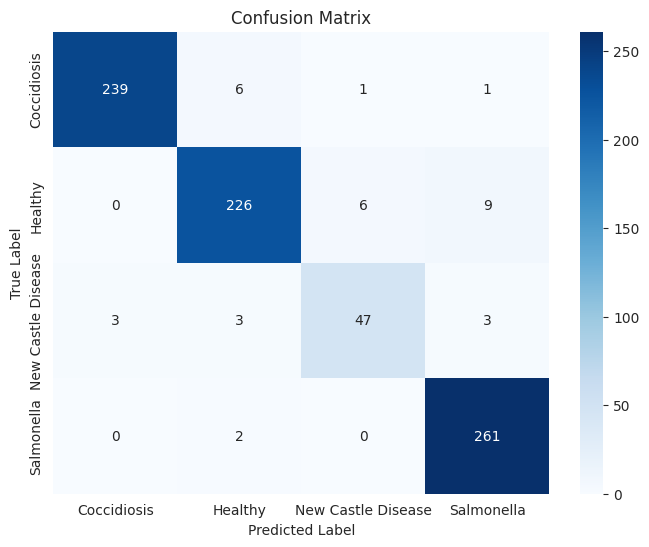

                    precision    recall  f1-score   support

       Coccidiosis       0.99      0.97      0.98       247
           Healthy       0.95      0.94      0.95       241
New Castle Disease       0.87      0.84      0.85        56
        Salmonella       0.95      0.99      0.97       263

          accuracy                           0.96       807
         macro avg       0.94      0.93      0.94       807
      weighted avg       0.96      0.96      0.96       807



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `test_gen` is your test data generator (e.g., ImageDataGenerator)
# `model` is the MobileNetV2 model you've built and trained

# Predict labels for the test set
y_pred = model.predict(test_gen, verbose=1)  # Predict using your MobileNetV2 model

# Convert predictions to class indices (argmax to get the most likely class)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the class labels from the test generator
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion Matrix
cm = confusion_matrix(test_gen.classes, y_pred_classes)

# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix')

# Classification Report
print(classification_report(test_gen.classes, y_pred_classes, target_names=classes))


Predict new image

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tai.jpg to tai.jpg


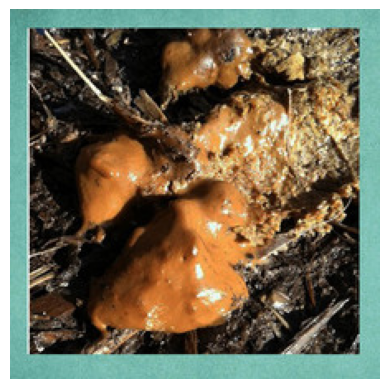

1/1 [==============================] - 1s 1s/step
Predicted class: Healthy


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('model_checkpoint.h5')  # Path to your saved model

# Path to the image you want to predict
img_path = 'tai.jpg'  # replace with the path to your test image

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image if needed

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make prediction
predictions = model.predict(img_array)

# Define the actual class labels based on your dataset
class_labels = ['Healthy', 'Salmonella', 'New Castle Disease', 'Coccidiosis']

# Get the predicted class
predicted_class_index = np.argmax(predictions)  # Get the index of the predicted class
predicted_class = class_labels[predicted_class_index]  # Get the class name using the predicted index

# Show the prediction result
print(f"Predicted class: {predicted_class}")


Save model

In [53]:
import os

# Assuming `model` is your trained MobileNetV2 model
# Assuming `test_score` is a tuple with the loss and accuracy from model evaluation

# Get model name and accuracy
model_name = model.name  # MobileNetV2 model name
subject = 'Chicken Disease'
acc = test_score[1] * 100  # Accuracy as percentage
save_path = ''  # Define the path where you want to save the model and weights

# Save the model
save_id = f'{model_name}-{subject}-{"%.2f" % round(acc, 2)}.h5'  # Generate a unique model name based on accuracy
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)  # Save the entire model
print(f'Model was saved as {model_save_loc}')

# Save the model weights
weight_save_id = f'{model_name}-{subject}-weights.h5'  # Generate a unique name for the weights
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)  # Save only the weights
print(f'Weights were saved as {weights_save_loc}')


Model was saved as sequential-Chicken Disease-95.79.h5
Weights were saved as sequential-Chicken Disease-weights.h5


In [54]:
!ls


 chicken-disease-1.zip		   model_checkpoint.h5			    tai.jpg
'Chicken Disease-class_dict.csv'   sample_data				    train_data.csv
 dataset			  'sequential-Chicken Disease-95.79.h5'
 drive				  'sequential-Chicken Disease-weights.h5'


In [55]:
from google.colab import files

# Unduh file model ke komputer lokal
files.download('sequential-Chicken Disease-95.79.h5')

# Jika Anda ingin mengunduh bobotnya, gunakan:
files.download('sequential-Chicken Disease-weights.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generate CSV files containing classes indicies & image size

In [ ]:
import pandas as pd
import os

# Assuming `train_gen` is your ImageDataGenerator instance
# Assuming `subject` and `save_path` are already defined

# Get the class dictionary from the training data generator
class_dict = train_gen.class_indices

# Image size from MobileNetV2 (Usually 224x224 for MobileNetV2)
img_size = (224, 224, 3)  # Image size MobileNetV2 expects (height, width, channels)
height = []
width = []

# Populate height and width for each class (same for all, as image size is fixed)
for _ in range(len(class_dict)):
    height.append(img_size[0])
    width.append(img_size[1])

# Create pandas series for class indices, class labels, height, and width
Index_series = pd.Series(list(class_dict.values()), name='class_index')
Class_series = pd.Series(list(class_dict.keys()), name='class')
Height_series = pd.Series(height, name='height')
Width_series = pd.Series(width, name='width')

# Combine them into a DataFrame
class_df = pd.concat([Index_series, Class_series, Height_series, Width_series], axis=1)

# Save the DataFrame to a CSV file
csv_name = f'{subject}-class_dict.csv'
csv_save_loc = os.path.join(save_path, csv_name)
class_df.to_csv(csv_save_loc, index=False)
print(f'Class CSV file was saved as {csv_save_loc}')


Class CSV file was saved as Chicken Disease-class_dict.csv


In [ ]:
from google.colab import files

# Ganti dengan lokasi penyimpanan yang sesuai
csv_file_path = '/content/Chicken Disease-class_dict.csv'

# Mendownload file
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>